In [133]:
import os

In [134]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("dataset"))
file_count = len(files)
# print(file_count)

['headphone', 'keyboard', 'mouse', 'pena', 'plastikbotol', 'random_test', 'ren_file.py', 'test.csv']


In [135]:
# Make new base directory
original_dataset_dir = 'dataset'
base_dir = 'data-benda'
os.mkdir(base_dir)

In [136]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 
# (cloud, folly, plastikbotol, mouse, pena)

train_cloud_dir = os.path.join(train_dir, 'headphone')
os.mkdir(train_cloud_dir)

train_keyboard_dir = os.path.join(train_dir, 'keyboard')
os.mkdir(train_keyboard_dir)

train_mouse_dir = os.path.join(train_dir, 'mouse')
os.mkdir(train_mouse_dir)

train_pena_dir = os.path.join(train_dir, 'pena')
os.mkdir(train_pena_dir)

train_plastikbotol_dir = os.path.join(train_dir, 'plastikbotol')
os.mkdir(train_plastikbotol_dir)


#Under validation folder create five folders 
# (cloud, folly, mouse, pena, plastikbotol)

validation_cloud_dir = os.path.join(validation_dir, 'headphone')
os.mkdir(validation_cloud_dir)

validation_keyboard_dir = os.path.join(validation_dir, 'keyboard')
os.mkdir(validation_keyboard_dir)

validation_mouse_dir = os.path.join(validation_dir, 'mouse')
os.mkdir(validation_mouse_dir)

validation_pena_dir = os.path.join(validation_dir, 'pena')
os.mkdir(validation_pena_dir)

validation_plastikbotol_dir = os.path.join(validation_dir, 'plastikbotol')
os.mkdir(validation_plastikbotol_dir)

In [137]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [138]:
HEADPHONE_SOURCE_DIR = 'dataset/headphone/'
TRAINING_HEADPHONE_DIR = 'data-benda/train/headphone/'
VALID_HEADPHONE_DIR = 'data-benda/validation/headphone/'

KEYBOARD_SOURCE_DIR = 'dataset/keyboard/'
TRAINING_KEYBOARD_DIR = 'data-benda/train/keyboard/'
VALID_KEYBOARD_DIR = 'data-benda/validation/keyboard/'

MOUSE_SOURCE_DIR = 'dataset/mouse/'
TRAINING_MOUSE_DIR = 'data-benda/train/mouse/'
VALID_MOUSE_DIR = 'data-benda/validation/mouse/'

PENA_SOURCE_DIR = 'dataset/pena/'
TRAINING_PENA_DIR = 'data-benda/train/pena/'
VALID_PENA_DIR = 'data-benda/validation/pena/'

PLASTIKBOTOL_SOURCE_DIR = 'dataset/plastikbotol/'
TRAINING_PLASTIKBOTOL_DIR = 'data-benda/train/plastikbotol/'
VALID_PLASTIKBOTOL_DIR = 'data-benda/validation/plastikbotol/'

In [139]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(HEADPHONE_SOURCE_DIR, TRAINING_HEADPHONE_DIR, VALID_HEADPHONE_DIR, split_size)
split_data(KEYBOARD_SOURCE_DIR, TRAINING_KEYBOARD_DIR, VALID_KEYBOARD_DIR, split_size)
split_data(MOUSE_SOURCE_DIR, TRAINING_MOUSE_DIR, VALID_MOUSE_DIR, split_size)
split_data(PENA_SOURCE_DIR, TRAINING_PENA_DIR, VALID_PENA_DIR, split_size)
split_data(PLASTIKBOTOL_SOURCE_DIR, TRAINING_PLASTIKBOTOL_DIR, VALID_PLASTIKBOTOL_DIR, split_size)

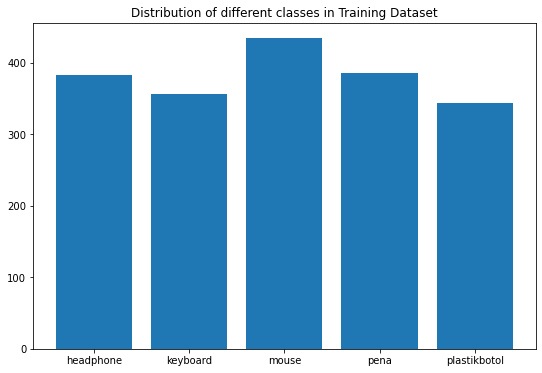

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['headphone', 'keyboard', 'mouse', 'pena', 'plastikbotol']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('data-benda/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [141]:
for i in ['headphone', 'keyboard', 'mouse', 'pena', 'plastikbotol']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('data-benda/train/'+i+'/'))))

Training headphone images are: 382
Training keyboard images are: 356
Training mouse images are: 434
Training pena images are: 385
Training plastikbotol images are: 343


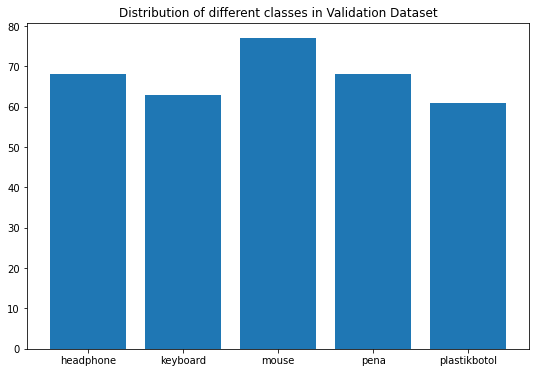

In [142]:
image_folder = ['headphone', 'keyboard', 'mouse', 'pena', 'plastikbotol']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('data-benda/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [143]:
for i in ['headphone', 'keyboard', 'mouse', 'pena', 'plastikbotol']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('data-benda/validation/'+i+'/'))))

Valid headphone images are: 68
Valid keyboard images are: 63
Valid mouse images are: 77
Valid pena images are: 68
Valid plastikbotol images are: 61


In [144]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [145]:
img_width=224; img_height=224
batch_size=30

In [146]:
TRAINING_DIR = 'data-benda/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1900 images belonging to 5 classes.


In [147]:
VALIDATION_DIR = 'data-benda/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 337 images belonging to 5 classes.


In [148]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = 'CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [149]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 50, 50, 64)       

In [150]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [151]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/50
64/64 [==============================] - 102s 2s/step - loss: 1.5419 - accuracy: 0.2868 - val_loss: 1.4556 - val_accuracy: 0.2908
Epoch 2/50
64/64 [==============================] - 88s 1s/step - loss: 1.2975 - accuracy: 0.4553 - val_loss: 1.1943 - val_accuracy: 0.4955
Epoch 3/50
64/64 [==============================] - 91s 1s/step - loss: 1.2252 - accuracy: 0.4658 - val_loss: 1.1722 - val_accuracy: 0.4985
Epoch 4/50
64/64 [==============================] - 89s 1s/step - loss: 1.1358 - accuracy: 0.5326 - val_loss: 1.0179 - val_accuracy: 0.5579
Epoch 5/50
64/64 [==============================] - 87s 1s/step - loss: 1.0482 - accuracy: 0.5758 - val_loss: 0.9974 - val_accuracy: 0.5697
Epoch 6/50
64/64 [==============================] - 85s 1s/step - loss: 1.0298 - accuracy: 0.5942 - val_loss: 0.9204 - val_accuracy: 0.6350
Epoch 7/50
64/64 [==============================] - 95s 1s/step - loss: 0.9558 - accuracy: 0.6316 - val_loss: 0.8341 - val_accuracy: 0.6528
Epoch 8/50
64/64 [=

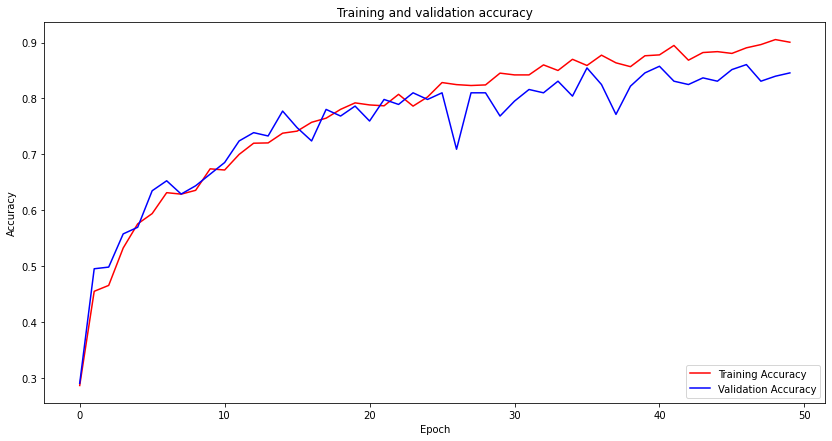

In [152]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

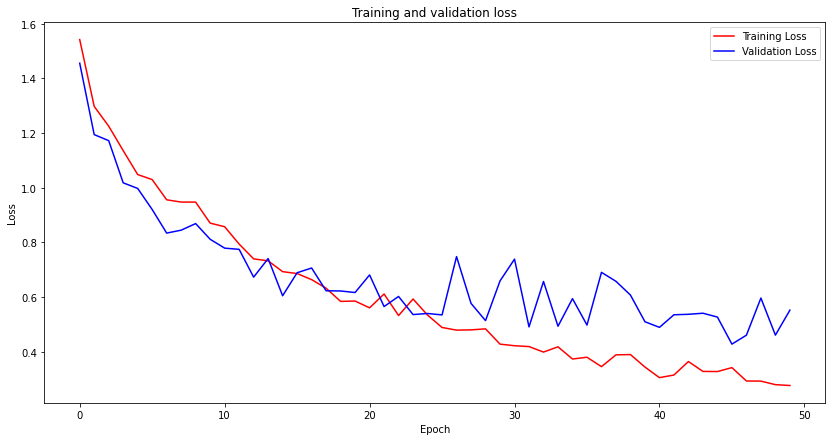

In [153]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [154]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [155]:
# Read Test Images Dir and their labels
test_images_dir = 'dataset/random_test/'
test_df = pd.read_csv('dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('test_preproc_CNN.npy', test_preprocessed_images)

In [156]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

35/35 [==============================] - 1s 16ms/step
[0 0 0 0 0 2 0 1 1 1 1 1 1 1 2 2 2 2 2 0 2 3 3 3 3 3 3 3 4 4 4 4 4 4 4]


In [157]:
test_df = pd.read_csv('dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    4
29    4
30    4
31    4
32    4
33    4
34    4
Name: labels, dtype: int64


In [158]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [159]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[6, 0, 1, 0, 0],
       [0, 7, 0, 0, 0],
       [1, 0, 6, 0, 0],
       [0, 0, 0, 7, 0],
       [0, 0, 0, 0, 7]], dtype=int64)

In [160]:
train_dir = 'data-benda/train/'
classes = os.listdir(train_dir)

In [161]:
#serialize model to YAML
model_yaml = model.to_json()
with open("model6_saved.yaml","w") as yaml_file:
    yaml_file.write(model_yaml)
#serialize weight to HDF5
model.save_weights('model6_saved.h5')
print("Model tersimpan")

Model tersimpan
